# HW 2: Supervised Learning Models
## Name: Jeonseo David Lee (UNI: jl6569)

## Part 1: Regression on California Test Scores


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
data.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

#### Histogram of Dependent Variable ("testscr")

- The dependent variable (testscr), which represents the test score, has a fairly uniform distribution across the range of scores, with the maximum population in the middle of the score range and a decreasing pattern toward the high and low test scores.

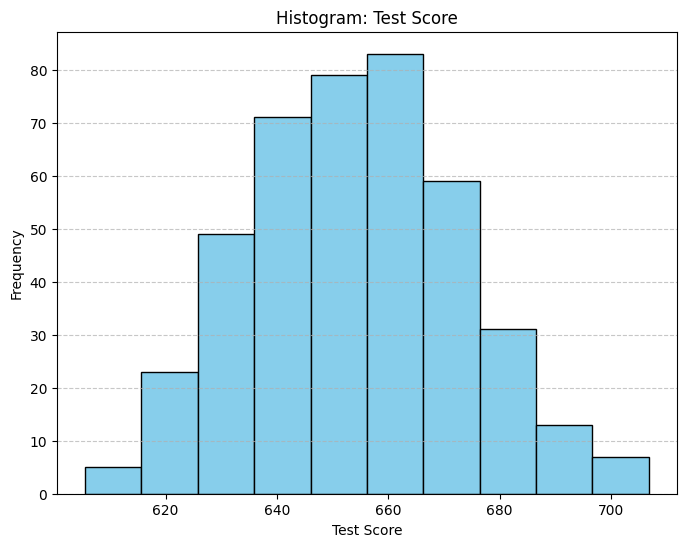

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(data['testscr'],color='skyblue', edgecolor='black')
plt.title('Histogram: Test Score')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Histogram of 3 Continous Variables: 

- I chose the three continuous variables calwpct (percent qualifying for CalWorks (income assistance)), avginc (average income), and mealpct (percent qualifying for reduced-price lunch) as most likely to have a correlation with test scores (testscr). All of my reasoning suggests that students from lower-income households may receive fewer educational resources in order to attain higher test scores; therefore, any variables that could represent the level of household income could be examined. 

- Unlike mealpct,% qualifying for reduced-price lunch, both calwpct (% qualifying for Calworks) and avginc (average income) exhibit a right-skewed distribution, with a substantially greater proportion of the population living in low-income households. 

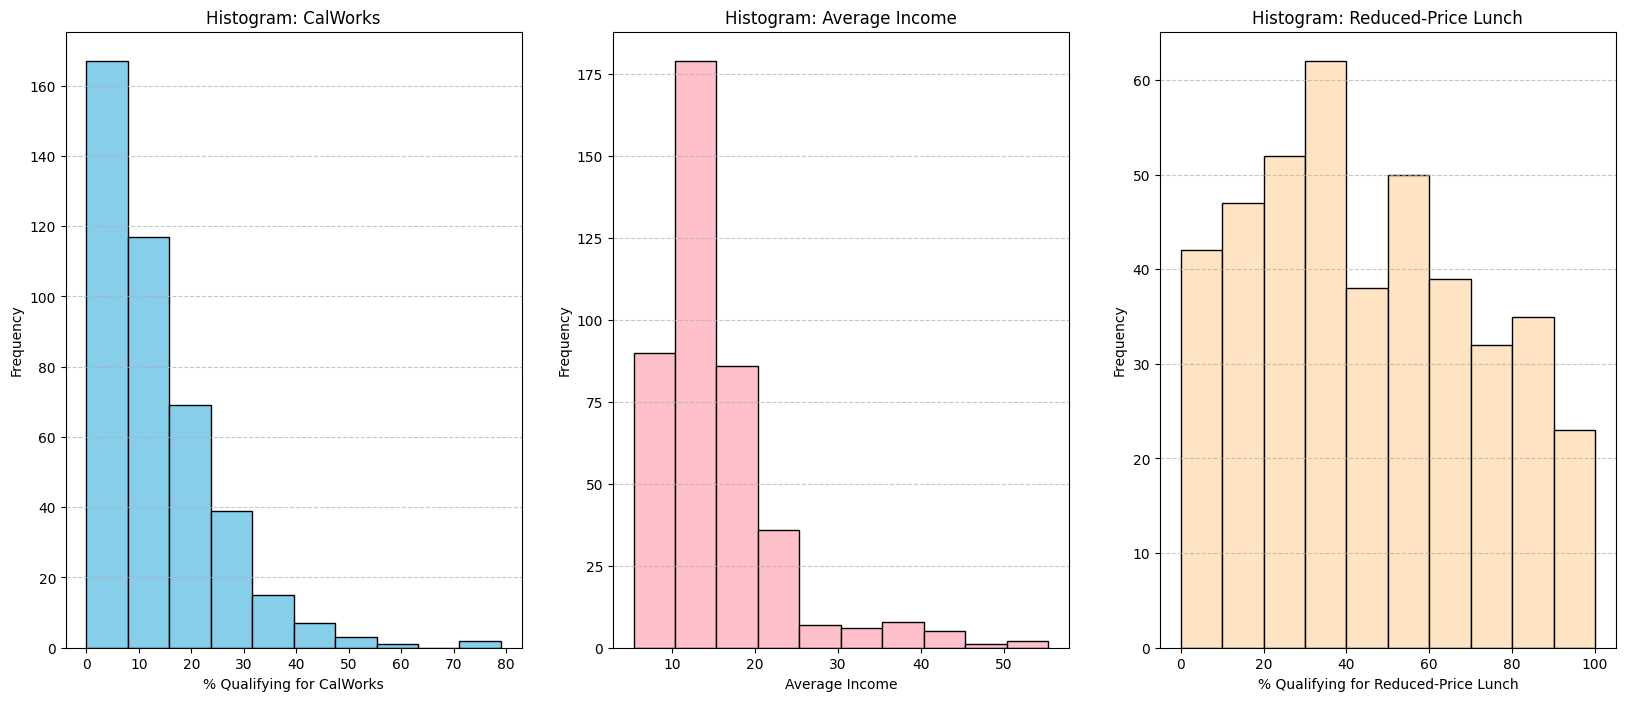

In [6]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.hist(data['calwpct'],color='skyblue', edgecolor='black')
plt.title('Histogram: CalWorks')
plt.xlabel('% Qualifying for CalWorks')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
plt.hist(data['avginc'],color='pink', edgecolor='black')
plt.title('Histogram: Average Income')
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
plt.hist(data['mealpct'],color='bisque', edgecolor='black')
plt.title('Histogram: Reduced-Price Lunch')
plt.xlabel('% Qualifying for Reduced-Price Lunch')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1.2 Visualize the dependency of the target on each feature from 1.1.
- Calwpct and mealpct both exhibit a negative slope, indicating that those who qualify for calworks, a program designed to assist households whose income and assets fall below State maximums for their size, and reduced-price lunch are more likely to have lower test scores.

- Avginc, on the other hand, suggests the positive slope in which pupils from low-income households tend to have lower test scores.

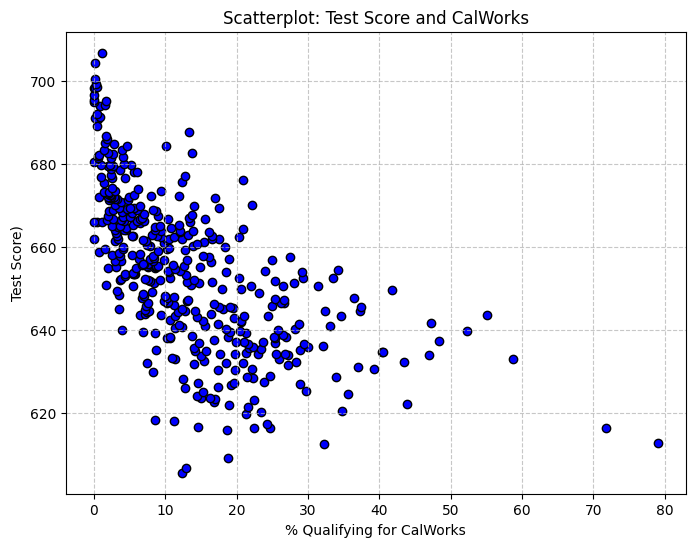

In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(data['calwpct'], data['testscr'], c='blue', marker='o', edgecolors='black')
plt.title('Scatterplot: Test Score and CalWorks')
plt.xlabel('% Qualifying for CalWorks')
plt.ylabel('Test Score)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

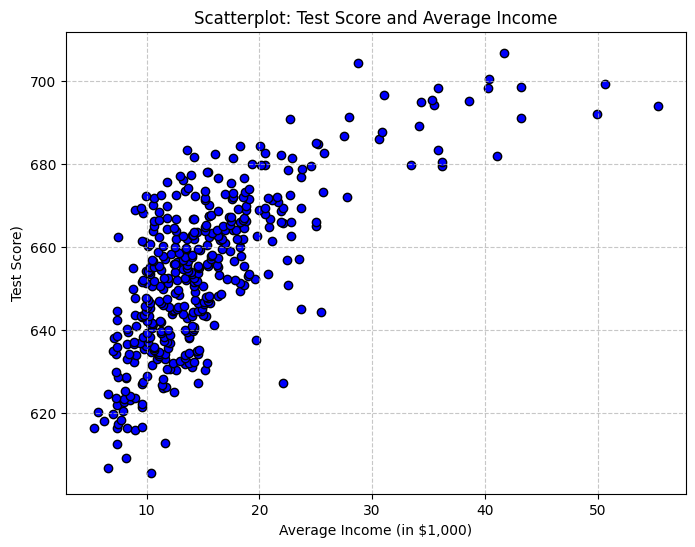

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data['avginc'], data['testscr'], c='blue', marker='o', edgecolors='black')
plt.title('Scatterplot: Test Score and Average Income')
plt.xlabel('Average Income (in $1,000)')
plt.ylabel('Test Score)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

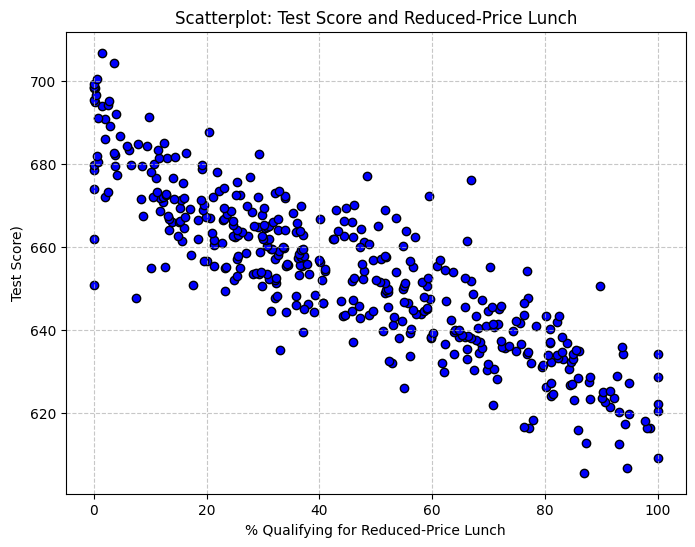

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data['mealpct'], data['testscr'], c='blue', marker='o', edgecolors='black')
plt.title('Scatterplot: Test Score and Reduced-Price Lunch')
plt.xlabel('% Qualifying for Reduced-Price Lunch')
plt.ylabel('Test Score)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

#### Split X and Y 

- Making sure that X does not include the variables, readscr and mathscr, which are used to generate the dependent variable (testscr). Also, the first five columns (rownames, distcod, county, district, grspan) should also be removed as they contain non-numeric values, which typically do not contain such patterns and are not suited for making predictions.

- Using the default parameters, I use cv=5 for all models under consideration.

- Without scaling, KNN Regressors' MSE values of both the training and test sets are disproportionately high and their accuracy scores are also disproportionately low, indicating that scaling is required (1-1). After scaling through StandardScaler, we now have a better KNN model with much lower MSE and higher R^2 scores for both training and test datasets (1-2).

- OLS does not inherently rely on scaling for its parameter estimation, and the scales of the features do not impact the coefficient estimates. In OLS, the coefficients are directly calculated to minimize the sum of the squared differences between the predicted values and the actual target values without any scaling. It is therefore anticipated that OLS will not have a significant impact on scaling. 

- After scaling, Ridge now has a lower MSE value for the test set from 84 to 76 (3-2), indicating that it improves predictive ability.

- Same with Ridge, Lasso also has a lower MSE value for the test set after scaling from 79 to 78 (4-2), indicating that it improves predictive ability. And since Lasso has a power to strictly remove a coefficeint that hits 0, there is one feature removed from the model: enrltot (total enrollment of teachers).


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Set the X and Y 
X = data.drop(columns=["testscr", "readscr", "mathscr", "rownames", "distcod", "county", "district", "grspan"])
y = data["testscr"]

 
# Split Training and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 1-1) KNN Model without Scaling

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)


# Training Set MSE 
training_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE  
test_scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")

# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test Set R^2 score: {:.2f}".format(knn.score(X_test, y_test)))

# y_pred = knn.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")

Mean Training MSE: 347.06174996845033
Mean Test MSE: 444.7866977412732
Training Set R^2 score: 0.32
Test Set R^2 score: 0.06


#### 1-2) KNN Model with Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

#scaler = MinMaxScaler() 
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(knn, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")

# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test Set R^2 score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# y_pred = knn.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")

Mean Training MSE: 96.04118239355267
Mean Test MSE: 103.11691928861981
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 2-1) Linear Regression (OLS) without Scaling 


In [13]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# Training Set MSE
training_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(lr, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")

# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set R^2 score: {:.2f}".format(lr.score(X_test, y_test)))

# y_pred = lr.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")


Mean Training MSE: 73.35449718882927
Mean Test MSE: 79.89844325111036
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 2-2) Linear Regression (OLS) with Scaling 


In [14]:
from sklearn.metrics import mean_squared_error

lr.fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE
test_scores = cross_val_score(lr, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")

# Training/ Test R^2 Scores 
print("Training Set R^2 score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test Set R^2 score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

# y_pred = lr.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")


Mean Training MSE: 73.35449718882958
Mean Test MSE: 79.8984432511107
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 3-1) Ridge without Scaling

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge().fit(X_train, y_train)

# Training Set MSE
training_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE
test_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")


# Training/ Test R^2 Scores 
print("Training Set R^2 score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Set R^2 score: {:.2f}".format(ridge.score(X_test, y_test)))

# y_pred = ridge.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")


Mean Training MSE: 73.18105598986082
Mean Test MSE: 84.26550949942177
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 3-2) Ridge with Scaling 


In [16]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

ridge_scaled = Ridge().fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(ridge_scaled, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(ridge_scaled, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")


# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(ridge_scaled.score(X_train_scaled, y_train)))
print("Test Set R^2 score: {:.2f}".format(ridge_scaled.score(X_test_scaled, y_test)))

# y_pred = ridge_scaled.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")


Mean Training MSE: 72.56227229239543
Mean Test MSE: 76.41706185692338
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 4-1) Lasso

In [17]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# Training Set MSE
training_scores = cross_val_score(lasso001, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE
test_scores = cross_val_score(lasso001, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")


# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test Set R^2 score: {:.2f}".format(lasso001.score(X_test, y_test)))

# y_pred = lasso001.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")


Mean Training MSE: 73.1804792228165
Mean Test MSE: 79.79693614797165
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### 4-2) Lasso with Scaling 



In [18]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

lasso001_scaled = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(lasso001_scaled, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE
test_scores = cross_val_score(lasso001_scaled, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")


# Training/ Test R^2 Scores
print("Training Set R^2 score: {:.2f}".format(lasso001_scaled.score(X_train_scaled, y_train)))
print("Test Set R^2 score: {:.2f}".format(lasso001_scaled.score(X_test_scaled, y_test)))

# y_pred = lasso001_scaled.predict(X_test_scaled)
# r2 = r2_score(y_test, y_pred)
# print(f"R^2 Score: {r2}")

Mean Training MSE: 72.4778910977736
Mean Test MSE: 78.07561211313849
Training Set R^2 score: 0.81
Test Set R^2 score: 0.80


#### One variable removed after scaling in Lasso: enrltot (total enrollment of teachers)

In [19]:
zero_coef_indices = np.where(lasso001_scaled.coef_ == 0)[0]

# Get the corresponding feature names from the original dataset
zero_coef_features = X.columns[zero_coef_indices]

# Print or inspect the feature names with zero coefficients
print("Features with zero coefficients:", zero_coef_features)


Features with zero coefficients: Index(['enrltot'], dtype='object')


### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve? As linear regression model does not require hyperparamters like regularization, we could apply it to all other models except the OLS.

- Besides the OLS model, I have performed gridsearches for KNN, Ridge, and Lasso with cv = 5. Except for KNN, both Ridge and Lasso appear to have improved performance after the gridsearch, as Ridge's MSE value has decreased from 76 to 73, and Lasso's MSE value has decreased from 78 to 76. The KNN performs worse after the gridsearch, as its MSE value increased from 103 to 107; possible cause for the increase in KNN's MSE includes the issue of underfitting in the original model with only 5 neighbors. The optimal model now uses 11 neighbors, suggesting that the initial MSE value might not effectively handle complex datasets, resulting in a relatively lower MSE initially.

#### 1) GridSearch on KNN-Scaled

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'n_neighbors': [1,3,5,7,9,10,11] } #np.arange creates sequence of numbers for each k value

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(grid_knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(grid_knn, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print("Best parameters: {}".format(grid_knn.best_params_))

print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")

print("Training Set R^2 score: {:.2f}".format(grid_knn.score(X_train_scaled, y_train)))
print("Test Set R^2 score: {:.2f}".format(grid_knn.score(X_test_scaled, y_test)))

Best parameters: {'n_neighbors': 11}
Mean Training MSE: 94.83776499967331
Mean Test MSE: 107.0820560946305
Training Set R^2 score: 0.78
Test Set R^2 score: 0.79


#### 2) GridSearch on Ridge-scaled: 



In [21]:
ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'max_iter': [100, 1000, 10000],   # Maximum number of iterations
}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Fit the Lasso model with the best hyperparameters
best_ridge = Ridge(alpha=best_params['alpha'], max_iter=best_params['max_iter'])
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)

# Training Set MSE 
training_scores = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(best_ridge, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

print("Best Hyperparameters:", best_params)
print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")
print("Training Set R^2 Score:", train_score)
print("Test Set R^2 Score:", test_score)


Best Hyperparameters: {'alpha': 10.0, 'max_iter': 100}
Mean Training MSE: 71.5906035348358
Mean Test MSE: 73.11179585354164
Training Set R^2 Score: 0.8056336897154931
Test Set R^2 Score: 0.8036297229175458


#### 3) GridSearch on Lasso-scaled 


In [22]:
lasso = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'max_iter': [100, 1000, 10000],   # Maximum number of iterations
}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Fit the Lasso model with the best hyperparameters
best_lasso = Lasso(alpha=best_params['alpha'], max_iter=best_params['max_iter'])
best_lasso.fit(X_train_scaled, y_train)

# Training Set MSE
training_scores = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
training_mse_scores = -training_scores  # Convert to positive MSE scores

# Test Set MSE 
test_scores = cross_val_score(best_lasso, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse_scores = -test_scores  # Convert to positive MSE scores

# Training/ Test R^2 Scores
train_score = best_lasso.score(X_train_scaled, y_train)
test_score = best_lasso.score(X_test_scaled, y_test)

print("Best Hyperparameters:", best_params)
print(f"Mean Training MSE: {training_mse_scores.mean()}")
print(f"Mean Test MSE: {test_mse_scores.mean()}")
print("Training Set R^2 Score:", train_score)
print("Test Set R^2 Score:", test_score)


Best Hyperparameters: {'alpha': 0.1, 'max_iter': 100}
Mean Training MSE: 71.44256845866161
Mean Test MSE: 75.49565943060274
Training Set R^2 Score: 0.8059812841062972
Test Set R^2 Score: 0.8021033940540958


### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

 

- The two best linear models of mine are Ridge and Lasso, as they both have higher R^2 scores and smaller MSE values than the OLS model. 

- As can be seen in the plots below, the coefficient amplitudes of each model follow a similar structure in which the importance of variables is ordered by mealpct (% qualifying for the reduced-price lunch), avginc (average income), elpct (district average income), and so on. 

- It is essential to observe, however, that Lasso performs the removal of 0 coefficients. Even though the plot indicates that four variables have been eliminated: enrltot (total enrollment of teachers), teachers (number of teachers), computers (number of computers), and compstu (number of computers per student), only three variables have been indeed eliminated where computer is still not equal to zero (but very close). These absent variables in Lasso can be interpreted as either positive or negative values in Ridge, but the magnitude of both is negligible.

- In general, the coefficients of these two models exhibit a similar structure, indicating that they concur as to which is the most significant. 

In [23]:
# 1. Ridge 

ridge_coefficients = best_ridge.coef_

print(f"Ridge Coefficients (scikit-learn): {ridge_coefficients}")

# 2. Lasso 

lasso_coefficients = best_lasso.coef_

print(f"Lasso Coefficients (scikit-learn): {lasso_coefficients}")

Ridge Coefficients (scikit-learn): [-0.15149565 -0.40246659 -1.27687425 -9.6274101   0.73070932 -0.1515225
  0.840543   -1.14307501  3.72735211 -3.57467409]
Lasso Coefficients (scikit-learn): [ 0.00000000e+00  0.00000000e+00 -5.67096607e-01 -1.08873808e+01
  6.93409589e-03  0.00000000e+00  7.76626408e-01 -1.06275809e+00
  3.47938050e+00 -3.00131719e+00]


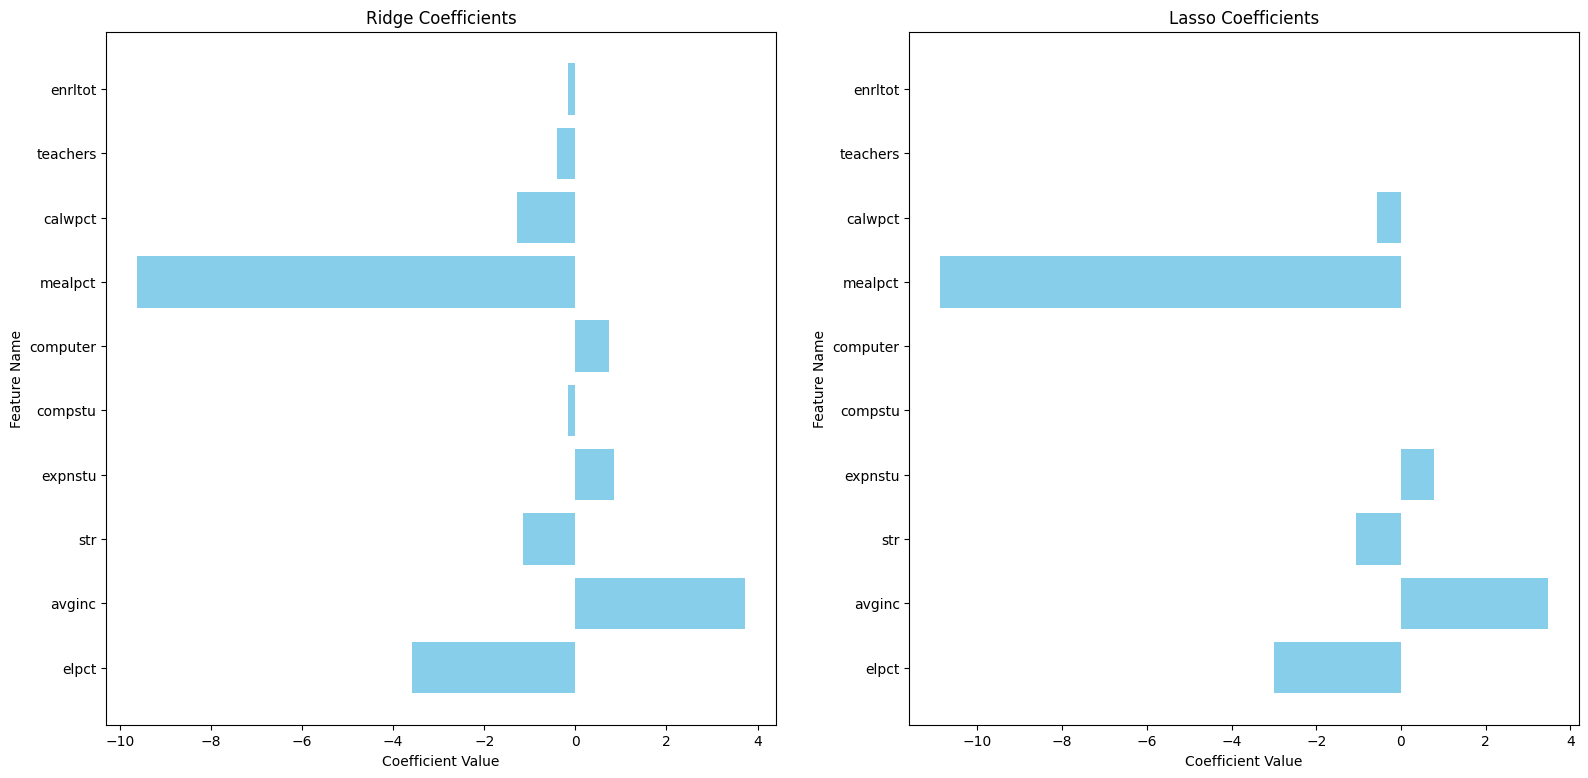

In [24]:
import matplotlib.pyplot as plt
feature_names = X_train.columns 

# 1. Ridge

# Create a bar plot to visualize the coefficients
plt.figure(figsize=(19, 9))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)
plt.barh(feature_names, ridge_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Ridge Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to display features from top to bottom


# 2. Lasso-scaled
plt.subplot(1, 2, 2)

# Create a bar plot to visualize the coefficients
plt.barh(feature_names, lasso_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Lasso Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to display features from top to bottom

### 1.6 Now that you have experimented with different models, discuss which final model you would choose to predict new data

 


- I would choose Ridge as my best model, as its MSE value of 73 is marginally lower than Lasso's MSE value of 75. Additionally, its R^2 score of 0.8036 is marginally higher than the Ridge model's R2 score of 0.8021, confirming its superior predictive ability. 



## Part 2: Classification on Red and White Wine Characteristics


### Merge Two Data Frames

In [154]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Creating a column named "Winetype"
red["winetype"] = 1
white["winetype"] = 0

# Creating a single dataframe 
wine = pd.concat([red, white])

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [155]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### Dependent Variable: Winetype



- The number of white wines, indicated as 0 in the variable, wine type, is 4898, which appears to be greater than the number of red wines, denoted as 1 in the variable, wine type, which is 1599.

In [156]:
wine['winetype'].value_counts()

winetype
0    4898
1    1599
Name: count, dtype: int64

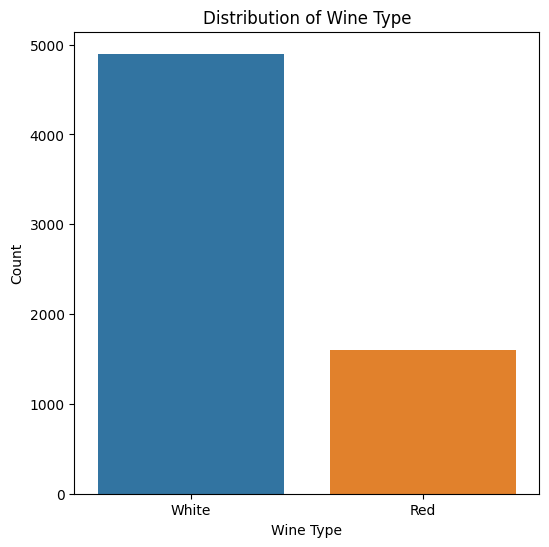

Number of white wine: 4898
Number of red wine 1599


In [157]:
plt.figure(figsize=(6, 6))
wine1 = wine.copy()

wine_temp = pd.Categorical(wine1["winetype"], categories = [0,1], ordered = True)
wine1["winetype"] = wine_temp.rename_categories(["White", "Red"])  

sns.countplot(x='winetype', data=wine1)
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Distribution of Wine Type')
plt.show()

count0 = (wine['winetype'] == 0).sum()
# Print the count
print("Number of white wine:", count0)

count1 = (wine['winetype'] == 1).sum()
# Print the count
print("Number of red wine", count1)


#### Histogram of Three Independent Variables to Consider: Fixed Acidity, Residual Sugar, and pH Level 

- I selected the three variables, fixed acidity, residual sugar, and pH level, because they may have a correlation with the distinction between red and white wine, as they may indicate how these two types of wine taste differently. 

- The fixed acidity appears to follow a right-skewed distribution, with a median of 7 and a decreasing distribution as wine acidity increases.

- The residual sugar follows a distribution that is even more right-skewed, with more than half of the entire distribution residing within 10. And it is extremely uncommon to find residual sugar levels exceeding 20. 

- Other than two variables, the pH level seems to have a more balanced distribution where the median level would be 3.3 for across all wine varieties.


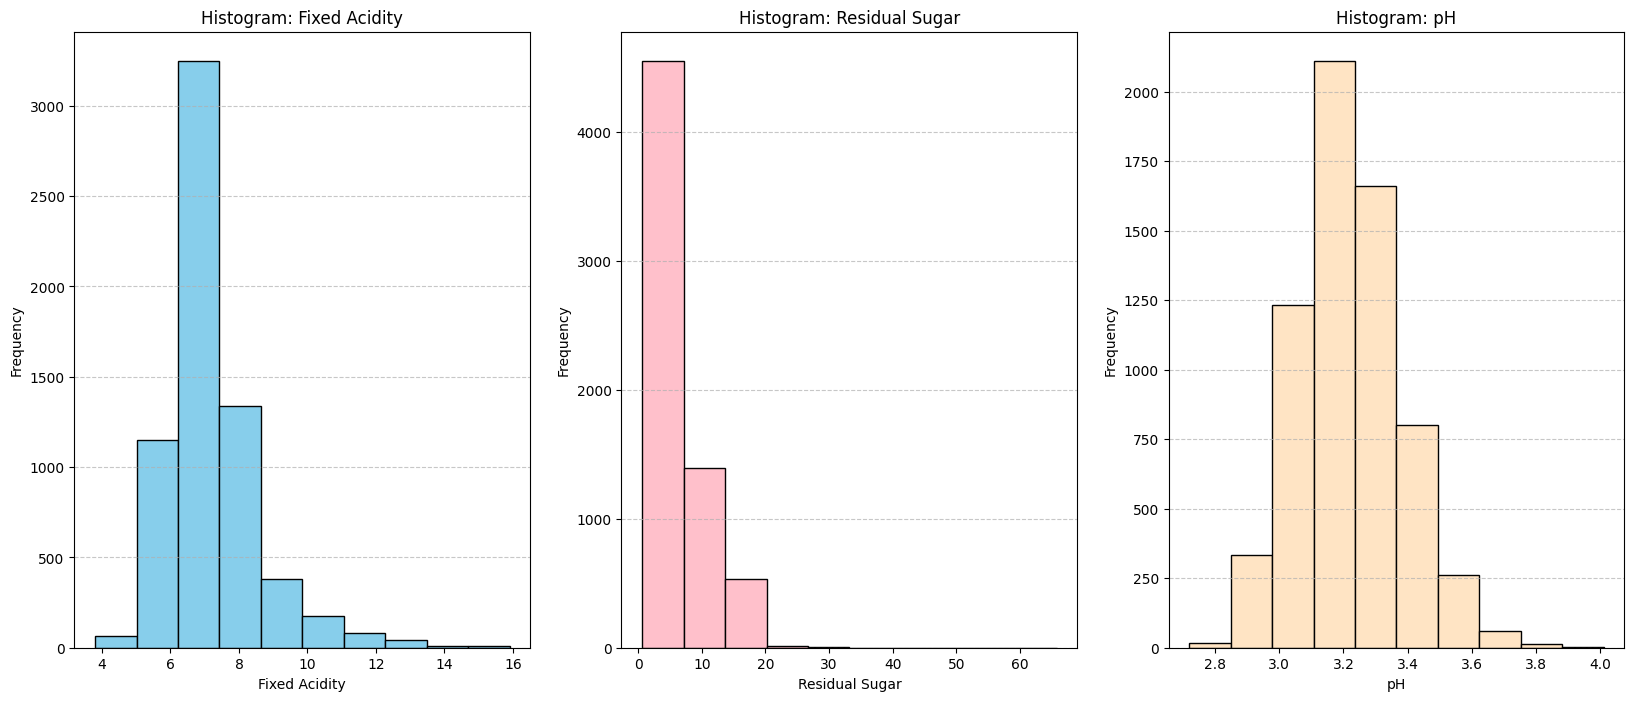

In [158]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.hist(wine['fixed acidity'],color='skyblue', edgecolor='black')
plt.title('Histogram: Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
plt.hist(wine['residual sugar'],color='pink', edgecolor='black')
plt.title('Histogram: Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
plt.hist(wine['pH'],color='bisque', edgecolor='black')
plt.title('Histogram: pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Boxplots of Three Independent Variables (X) by Wine Type (Y)

- Unlike the previous histogram distributions, I have integrated boxplots for each of three independent variables by wine type (our Y, the target variable) to see how each component differs between white and red wine.

- Fixed acidity appears to be generally greater in Red wine than in White wine, with a wider acidity distribution as well.

- Unlike fixed acidity, residual sugar appears to be higher in white wine than in red wine, which makes intuitive sense as acidity and sugar or sweetness tend to oppose one another.

- Lastly, pH level resembles the trend of fixed acidity, indicating a strong correlation between pH level and fixed acidity.

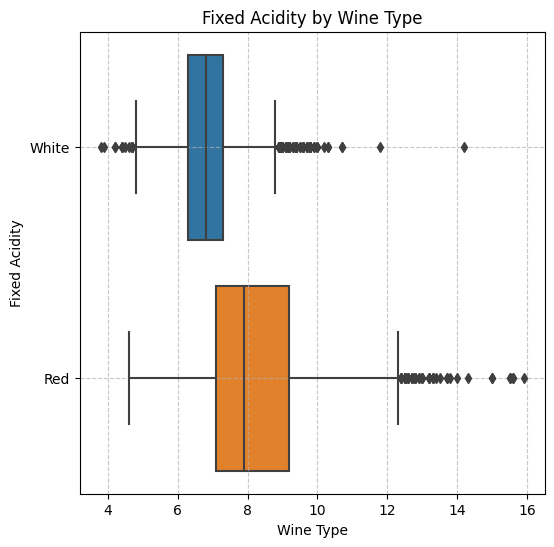

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.boxplot(x='fixed acidity', y='winetype', data=wine1)
plt.title('Fixed Acidity by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Fixed Acidity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
plt.show()

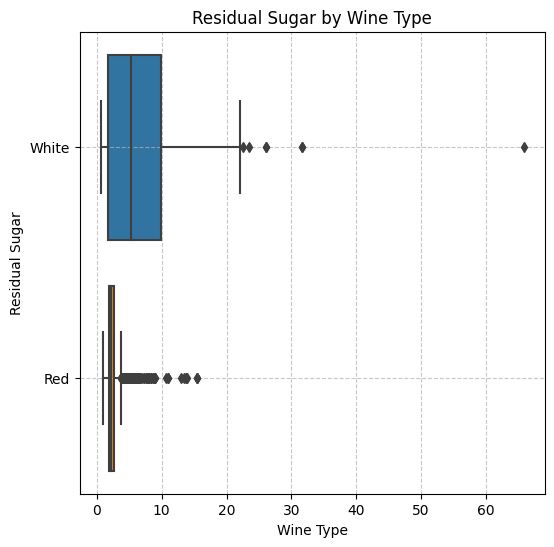

In [162]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='residual sugar', y='winetype', data=wine1)
plt.title('Residual Sugar by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Residual Sugar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

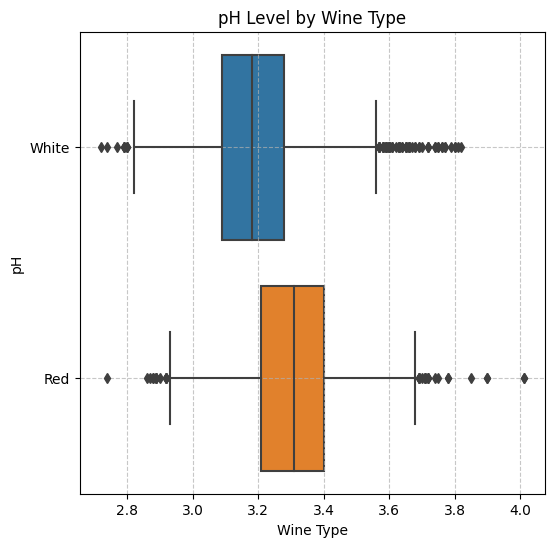

In [163]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='pH', y='winetype', data=wine1)
plt.title('pH Level by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('pH')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- I would choose Ridge as my best model, as its test-set accuracy score of 0.804 is marginally higher than Lasso's score of 0.802. In addition, Ridge has a lower MSE value (approximately 73) than Lasso (approximately 76), indicating superior predictive modeling. 

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

- I use cv=5 and the accuracy score with the default parameters for all models under consideration.

- Prior to scaling, the accuracy scores for four (separating the Lasso and Ridge models in penalized logistic regression) were not significantly different. However, the significance of scaling that led to improved performance on the accuracy score has been acknowledged by all. 

- Without scaling, the test-set accuracy score appears to be 0.93 (Refer to 1-1). Nonetheless, after scaling the X_train dataset using the conventional scaler method, our accuracy score increases to 0.98 (1-2), demonstrating the significance of scaling. 

- Similar to the KNN Classifier, the accuracy score for test-set of unpenalized logistic regression improved marginally from 0.979 (2-1) to 0.989 (2-2), indicating that scaling is essential. 

- After scaling, both penalized logistic regression models (Ridge and Lasso) also achieve greater accuracy in their test sets. 

#### Train and Test Split 

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Set the X and Y 
X = wine.drop(columns="winetype")
y = wine["winetype"]


# Split Training and Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1-1) KNN Classification without Scaling

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
knn_train_score = knn_train_score.mean()

knn_test_score = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
knn_test_score = knn_test_score.mean()


print(f"Training-Set Accuracy Score: {knn_train_score}")
print(f"Test-Set Accuracy ascore: {knn_test_score}")

Training-Set Accuracy Score: 0.9418892055970979
Test-Set Accuracy ascore: 0.9307692307692308


#### 1-2) KNN Model with Scaling

In [166]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

#scaler = MinMaxScaler() 
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

knn_train_score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
knn_train_score = knn_train_score.mean()

knn_test_score = cross_val_score(knn, X_test_scaled, y_test, cv=5, scoring='accuracy')
knn_test_score = knn_test_score.mean()

print(f"Training-Set Accuracy Score: {knn_train_score}")
print(f"Test-Set Accuracy ascore: {knn_test_score}")


Training-Set Accuracy Score: 0.9940349448434145
Test-Set Accuracy ascore: 0.9853846153846154


#### 2-1) Logistic Regression without Scaling 

In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

#set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty=None, max_iter = 100000).fit(X_train, y_train)

logreg_train_score = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
logreg_train_score = logreg_train_score.mean()

logreg_test_score = cross_val_score(logreg, X_test, y_test, cv=5, scoring='accuracy')
logreg_test_score = logreg_test_score.mean()

print(f"Training-Set Accuracy Score: {logreg_train_score}")
print(f"Test-Set Accuracy ascore: {logreg_test_score}")


Training-Set Accuracy Score: 0.9921105722958465
Test-Set Accuracy ascore: 0.9792307692307693


#### 2-2) Logistic Regression with Scaling 



In [168]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

logreg_scaled = LogisticRegression(penalty=None, max_iter = 100000).fit(X_train_scaled, y_train)

logreg_scaled_train_score = cross_val_score(logreg_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
logreg_scaled_train_score = logreg_scaled_train_score.mean()

logreg_scaled_test_score = cross_val_score(logreg_scaled, X_test_scaled, y_test, cv=5, scoring='accuracy')
logreg_scaled_test_score = logreg_scaled_test_score.mean()

print(f"Training-Set Accuracy Score: {logreg_scaled_train_score}")
print(f"Test-Set Accuracy ascore: {logreg_scaled_test_score}")

Training-Set Accuracy Score: 0.9940355001110536
Test-Set Accuracy ascore: 0.9892307692307692


#### 3-1) Penalized Logistic Regression (L2: Ridge) without Scaling

In [169]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

penalized_l2 = LogisticRegression(C=100, penalty='l2', max_iter = 100000).fit(X_train, y_train)

penalized_l2_train_score = cross_val_score(penalized_l2, X_train, y_train, cv=5, scoring='accuracy')
penalized_l2_train_score = penalized_l2_train_score.mean()

penalized_l2_test_score = cross_val_score(penalized_l2, X_test, y_test, cv=5, scoring='accuracy')
penalized_l2_test_score = penalized_l2_test_score.mean()

print(f"Training-Set Accuracy Score: {penalized_l2_train_score}")
print(f"Test-Set Accuracy ascore: {penalized_l2_test_score}")

Training-Set Accuracy Score: 0.989417154068261
Test-Set Accuracy ascore: 0.9807692307692308


#### 3-2) Penalized Logistic Regression (L2: Ridge) with Scaling

In [170]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

#scaler = MinMaxScaler() 
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

penalized_l2_scaled = LogisticRegression(C=100, penalty='l2', max_iter = 100000).fit(X_train_scaled, y_train)

penalized_l2_scaled_train_score = cross_val_score(penalized_l2_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
penalized_l2_scaled_train_score = penalized_l2_scaled_train_score.mean()

penalized_l2_scaled_test_score = cross_val_score(penalized_l2_scaled, X_test_scaled, y_test, cv=5, scoring='accuracy')
penalized_l2_scaled_test_score = penalized_l2_scaled_test_score.mean()


print(f"Training-Set Accuracy Score: {penalized_l2_scaled_train_score}")
print(f"Test-Set Accuracy ascore: {penalized_l2_scaled_test_score}")

Training-Set Accuracy Score: 0.9940355001110536
Test-Set Accuracy ascore: 0.9892307692307692


#### 4-1) Penalized Logistic Regression (L1: Lasso) without Scaling

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

#set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
penalized_l1 = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter = 100000).fit(X_train, y_train)

penalized_l1_train_score = cross_val_score(penalized_l1, X_train, y_train, cv=5, scoring='accuracy')
penalized_l1_train_score = penalized_l1_train_score.mean()

penalized_l1_test_score = cross_val_score(penalized_l1, X_test, y_test, cv=5, scoring='accuracy')
penalized_l1_test_score = penalized_l1_test_score.mean()

print(f"Training-Set Accuracy Score: {penalized_l1_train_score}")
print(f"Test-Set Accuracy ascore: {penalized_l1_test_score}")


Training-Set Accuracy Score: 0.9890327237728587
Test-Set Accuracy ascore: 0.9807692307692308


#### 4-2) Penalized Logistic Regression (L1: Lasso) with Scaling

In [172]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing

#scaler = MinMaxScaler() 
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

penalized_l1_scaled = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter = 100000).fit(X_train_scaled, y_train)

penalized_l1_scaled.fit(X_train_scaled, y_train)

penalized_l1_scaled_train_score = cross_val_score(penalized_l1_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
penalized_l1_scaled_train_score = penalized_l1_scaled_train_score.mean()

penalized_l1_scaled_test_score = cross_val_score(penalized_l1_scaled, X_test_scaled, y_test, cv=5, scoring='accuracy')
penalized_l1_scaled_test_score = penalized_l1_scaled_test_score.mean()

print(f"Training-Set Accuracy Score: {penalized_l1_scaled_train_score}")
print(f"Test-Set Accuracy ascore: {penalized_l1_scaled_test_score}")

Training-Set Accuracy Score: 0.9940355001110536
Test-Set Accuracy ascore: 0.9892307692307692


### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

- Using GridSearchCV, the accuracy scores of all four models, which were already sufficient, increased marginally.

- Using gridsearchcv, the optimal KNN classifier parameter is determined to be n = 7, and it appears to perform better as the accuracy score, which was 0.9853 prior to gridssearch, has increased to 0.9876.

- In addition, the accuracy score of the unpenalized logistic regression model increases from 0.989 to 0.991 as a result of the parameter settings of max_iter = 100, as opposed to the original setting of max_iter = 100000. 

- Ridge Model's accuracy score for the test set is also enhanced, and its optimal parameters are now C = 10 and max_iter = 100. 

- The gridsearchcv accuracy score for the Lasso Model has increased from 0.98 to 0.991, and its new optimal parameters are C = 1 and max_iter = 100.

#### 1) KNN Classifier Scaled 

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7]
}
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5, scoring='accuracy')

knn_grid_search.fit(X_train_scaled, y_train)

best_knn_params = knn_grid_search.best_params_
train_accuracy = knn_grid_search.score(X_train_scaled, y_train)
test_accuracy = knn_grid_search.score(X_test_scaled, y_test)

print("Best KNN Parameters:", best_knn_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")


Best KNN Parameters: {'n_neighbors': 7}
Training-Set Accuracy Score: 0.9953819511256494
Test-Set Accuracy ascore: 0.9876923076923076


#### 2) Logistic Regression Scaled

In [174]:
logistic_param_grid = {
    'max_iter': [100, 1000, 10000, 100000]
    
}
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logistic_classifier = LogisticRegression(penalty=None)

logistic_grid_search = GridSearchCV(logistic_classifier, logistic_param_grid, cv=5, scoring='accuracy')

logistic_grid_search.fit(X_train_scaled, y_train)

best_logistic_params = logistic_grid_search.best_params_
train_accuracy = logistic_grid_search.score(X_train_scaled, y_train)
test_accuracy = logistic_grid_search.score(X_test_scaled, y_test)

print("Best Logistic Regression Parameters:", best_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")

Best Logistic Regression Parameters: {'max_iter': 100}
Training-Set Accuracy Score: 0.9940350202039638
Test-Set Accuracy ascore: 0.9907692307692307


#### 3) Penalty Logistic Regression Scaled (L2: Ridge)

In [175]:
penalized_logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000, 100000] 
}

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

penalized_logistic_regressor_l2 = LogisticRegression(penalty='l2')

penalized_logistic_grid_search_l2 = GridSearchCV(penalized_logistic_regressor_l2, penalized_logistic_param_grid, cv=5, scoring='accuracy')

penalized_logistic_grid_search_l2.fit(X_train_scaled, y_train)

best_penalized_logistic_params = penalized_logistic_grid_search_l2.best_params_
train_accuracy = penalized_logistic_grid_search_l2.score(X_train_scaled, y_train)
test_accuracy = penalized_logistic_grid_search_l2.score(X_test_scaled, y_test)

print("Best Ridge-Penalty Logistic Regression Parameters:", best_penalized_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")


Best Ridge-Penalty Logistic Regression Parameters: {'C': 10, 'max_iter': 100}
Training-Set Accuracy Score: 0.9940350202039638
Test-Set Accuracy ascore: 0.9907692307692307


#### 4) Penalty Logistic Regression Scaled (L1: Lasso)

In [176]:
penalized_logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000, 100000] 
}

scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

penalized_logistic_regressor_l1 = LogisticRegression(penalty='l1', solver = "liblinear")

penalized_logistic_grid_search_l1 = GridSearchCV(penalized_logistic_regressor_l1, penalized_logistic_param_grid, cv=5, scoring='accuracy')

penalized_logistic_grid_search_l1.fit(X_train_scaled, y_train)

best_penalized_logistic_params = penalized_logistic_grid_search_l1.best_params_
train_accuracy = penalized_logistic_grid_search_l1.score(X_train_scaled, y_train)
test_accuracy = penalized_logistic_grid_search_l1.score(X_test_scaled, y_test)

print("Best Lasso-Penalty Logistic Regression Parameters:", best_penalized_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")


Best Lasso-Penalty Logistic Regression Parameters: {'C': 1, 'max_iter': 100}
Training-Set Accuracy Score: 0.9940350202039638
Test-Set Accuracy ascore: 0.9907692307692307


### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

- As GridSearchCV performs 5-fold cross-validation by default when searching for the best hyperparameters for a machine learning model, I tried to change its setting to have it as 11. When separating the dataset into training and test sets, I also altered the random state from 42 to 30 states. 

- The KNN classifier's parameters change as we modify the random state and k-fold to 11. In the random state of 30, the KNN classifier returns a variety of parameters and test accuracy; for example, the n_neighbor parameter is set to 3 with a test accuracy score of 0.9915, 5 with 0.9930, and 1 with 0.9938, which records the lowest accuracy score range out of all four models.

- The parameters of the unpenalized logistic regression model were also altered. In the random state of 30, the parameters are once set to {'class_weight': 'balanced','max_iter': 100} with a test accuracy score of 0.9953, whereas the parameter {'class_weight': 'None','max_iter': 100} yields a test accuracy score of 0.9938.

- In the case of the Ridge penalized logistic model, the parameters are also changed between {'C': 100, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'} and {'C': 100, 'class_weight': 'None', 'max_iter': 100, 'solver': 'lbfgs'} with differeing test accuracy scores.

- Similarly, the parameters of the Lasso penalized logistic model are also changed in {'C': 1, 'class_weight': None,'max_iter': 100} and {'C': 1, 'class_weight': 'balanced','max_iter': 100} with varying accuracy scores.

- Therfore, we could conclude that changing either the random state or k-fold could make the parameters changed for all four models, with a belief that unpenalized regression model can still give us the highest test accuracy out of all.


#### 1) K-Fold on KNN Scaled


In [145]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier()

kf = KFold(n_splits=11, shuffle=True)

knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=kf, scoring='accuracy')

knn_grid_search.fit(X_train_scaled, y_train)

best_logistic_params = knn_grid_search.best_params_
train_accuracy = knn_grid_search.score(X_train_scaled, y_train)
test_accuracy = knn_grid_search.score(X_test_scaled, y_test)

print("Best Logistic Regression Parameters:", best_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")

Best Logistic Regression Parameters: {'n_neighbors': 5}
Training-Set Accuracy Score: 0.9949971137194535
Test-Set Accuracy ascore: 0.9930769230769231


#### 2) K-Fold on Logistic Regression Scaled

In [151]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

logistic_param_grid = {
    'max_iter': [100, 1000, 10000, 100000],
    'class_weight': [None, 'balanced']
}
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression(penalty=None)

kf = KFold(n_splits=11, shuffle=True)

logistic_grid_search = GridSearchCV(logistic_regression, logistic_param_grid, cv=kf, scoring='accuracy')

logistic_grid_search.fit(X_train_scaled, y_train)

best_logistic_params = logistic_grid_search.best_params_
train_accuracy = logistic_grid_search.score(X_train_scaled, y_train)
test_accuracy = logistic_grid_search.score(X_test_scaled, y_test)

print("Best Logistic Regression Parameters:", best_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy ascore: {test_accuracy}")

Best Logistic Regression Parameters: {'class_weight': 'balanced', 'max_iter': 100}
Training-Set Accuracy Score: 0.9944198576101597
Test-Set Accuracy ascore: 0.9953846153846154


#### 3) K-Fold on Ridge (l2) Regression Scaled

In [152]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

penalized_logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000, 100000],
    'solver': ['lbfgs', 'newton-cg'],
    'class_weight': [None, 'balanced']
}

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

penalized_logistic_regressor_l1 = LogisticRegression(penalty='l2')

# Use KFold with shuffling for cross-validation
kf = KFold(n_splits=11, shuffle=True)

penalized_logistic_grid_search_l1 = GridSearchCV(penalized_logistic_regressor_l1, penalized_logistic_param_grid, cv=kf, scoring='accuracy')

penalized_logistic_grid_search_l1.fit(X_train_scaled, y_train)

best_penalized_logistic_params = penalized_logistic_grid_search_l1.best_params_
train_accuracy = penalized_logistic_grid_search_l1.score(X_train_scaled, y_train)
test_accuracy = penalized_logistic_grid_search_l1.score(X_test_scaled, y_test)

print("Best Ridge-Penalty Logistic Regression Parameters:", best_penalized_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy Score: {test_accuracy}")


Best Ridge-Penalty Logistic Regression Parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}
Training-Set Accuracy Score: 0.9942274389070618
Test-Set Accuracy Score: 0.9946153846153846


#### 4) K-Fold on Lasso (l1) Regression Scaled

In [150]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

penalized_logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 1000, 10000, 100000],
    'class_weight': [None, 'balanced']
}

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

penalized_logistic_regressor_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Use KFold with shuffling for cross-validation
kf = KFold(n_splits=11, shuffle=True)

penalized_logistic_grid_search_l1 = GridSearchCV(penalized_logistic_regressor_l1, penalized_logistic_param_grid, cv=kf, scoring='accuracy')

penalized_logistic_grid_search_l1.fit(X_train_scaled, y_train)

best_penalized_logistic_params = penalized_logistic_grid_search_l1.best_params_
train_accuracy = penalized_logistic_grid_search_l1.score(X_train_scaled, y_train)
test_accuracy = penalized_logistic_grid_search_l1.score(X_test_scaled, y_test)

print("Best Lasso-Penalty Logistic Regression Parameters:", best_penalized_logistic_params)
print(f"Training-Set Accuracy Score: {train_accuracy}")
print(f"Test-Set Accuracy Score: {test_accuracy}")


Best Lasso-Penalty Logistic Regression Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100}
Training-Set Accuracy Score: 0.9949971137194535
Test-Set Accuracy Score: 0.9938461538461538


### 2.5 Lastly, discuss which final model you would choose to predict new data. 

- Given that the random state and k-fold have (slightly) altered the hyperparameters and test accuracy score of our four models, a more theoretical and practical approach is required to select our best model to predict new data. I would select an unpenalized logistic regression model because, first and foremost, under the random state = 30 and k-fold = 7 conditions, it has the ability to provide the highest test accuracy score of 0.9958 among the four models. In addition, because our "wine" datasets contain fewer than 15 features to select, which is relatively less complex so that we can avoid making our model unnecessarily complex, I would conclude that unpenalized logistic regression is preferable to other penalized logistic regression models such as Ridge or Lasso. Also, unpenalized logistic regression models tend to be more interpretable than penalized logistic regression models (Ridge or Lasso).